In [28]:
import pandas as pd
URL = 'https://raw.githubusercontent.com/sivaramkazure/AI-training/main/crop_recommendation.csv'
data = pd.read_csv(URL, header=0)
data.head()

,id,country code,N1,N,P,K,temperature,humidity,ph,rainfall,label
0,1,91,100,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,2,91,95,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,3,91,70,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,4,91,84,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,5,91,88,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
encode = preprocessing.LabelEncoder() 
data['label_encoded']= encode.fit_transform(data['label'])
data.head() 

y = data['label_encoded']

x = data.iloc[:, :-1]
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label_encoded, dtype: int64

In [33]:
#correlation check
all_col_names = list(data.columns) 
all_col_names.remove('label')
all_col_names.remove('label_encoded')
numbers_only = data.loc[:, all_col_names]
cors = numbers_only.corr()
cors

,id,country code,N1,N,P,K,temperature,humidity,ph,rainfall
id,1.000000,NaN,0.282965,0.282965,-0.167593,0.143461,0.179543,0.524157,0.053330,0.121006
country code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N1,0.282965,NaN,1.000000,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
N,0.282965,NaN,1.000000,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.167593,NaN,-0.231460,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,0.143461,NaN,-0.140512,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.179543,NaN,0.026504,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.524157,NaN,0.190688,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.053330,NaN,0.096683,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.121006,NaN,0.059020,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [10]:
%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<Axes: >

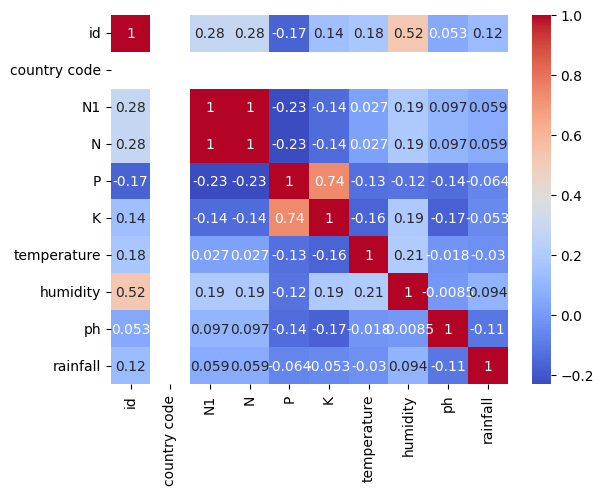

In [34]:
import seaborn as sns
sns.heatmap(cors, cmap = 'coolwarm',annot=True)


In [35]:
#converting id as index
data.set_index('id', inplace=True)

In [36]:
#as per heat map removing "country code"
#based on correlation value removing "N1" column as its same as "N" column
x= data.iloc[:, 2:-2]
x.head()

,N,P,K,temperature,humidity,ph,rainfall
id,,,,,,,
1,90,42,43,20.879744,82.002744,6.502985,202.935536
2,85,58,41,21.770462,80.319644,7.038096,226.655537
3,60,55,44,23.004459,82.320763,7.840207,263.964248
4,74,35,40,26.491096,80.158363,6.980401,242.864034
5,78,42,42,20.130175,81.604873,7.628473,262.717340


In [37]:
#checking null values in data
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 1 to 2200
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country code   2200 non-null   int64  
 1   N1             2200 non-null   int64  
 2   N              2200 non-null   int64  
 3   P              2200 non-null   int64  
 4   K              2200 non-null   int64  
 5   temperature    2200 non-null   float64
 6   humidity       2200 non-null   float64
 7   ph             2200 non-null   float64
 8   rainfall       2200 non-null   float64
 9   label          2200 non-null   object 
 10  label_encoded  2200 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 206.2+ KB


In [38]:
# applying z scalar model on X data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
mu = xtrain.describe().T['mean']
sigma = xtrain.describe().T['std']
xtrain_norm = (xtrain - mu) / sigma
xtest_norm = (xtest - mu) / sigma
xtrain_norm.head()

,N,P,K,temperature,humidity,ph,rainfall
id,,,,,,,
300,-0.037003,0.486683,0.688748,-1.416313,-2.503541,1.044514,-0.401586
459,-0.941133,0.732388,-0.515122,1.143876,-1.597439,0.139838,-0.059830
1690,-0.447971,-1.294685,-0.755896,1.195549,1.036934,1.174639,0.207095
1286,-1.215111,2.298763,3.056360,0.070424,0.499953,-0.825971,-0.610528
73,0.784934,-0.342575,-0.214154,-0.141496,0.511664,0.157841,3.493731


In [39]:
xtrain_norm.max()


N              2.456204
P              2.820888
K              3.156683
temperature    3.452644
humidity       1.277044
ph             4.541694
rainfall       3.547485
dtype: float64

In [40]:

# outliers
outliers = (xtrain_norm > 3) | (xtrain_norm < -3)
xtrain_norm['isOutlier'] = outliers.sum(axis=1)
all_outliers = xtrain_norm[xtrain_norm['isOutlier'] > 0]
all_outliers.index
     

Index([1286,   73, 1232, 1539, 1685, 1751, 1506, 1702, 1250, 1288,
       ...
       1276,  591,   76, 1545, 1287, 1240,   70, 1554,  584,   77],
      dtype='int64', name='id', length=164)

In [41]:
xtrain_norm_backup = xtrain_norm

for myindex in all_outliers.index:
  for col_name in xtrain_norm.columns:
    datapoint = xtrain_norm.loc[myindex, [col_name]]
    if(datapoint[0] > 3):
      xtrain_norm.loc[myindex, [col_name]] = 3.0

    if( datapoint[0] < -3 ):
      xtrain_norm.loc[myindex, [col_name]] = -3.0
# check again if any outliers are still present
outliers = (xtrain_norm > 3) | (xtrain_norm < -3)
xtrain_norm['isOutlier'] = outliers.sum(axis=1)
all_outliers = xtrain_norm[xtrain_norm['isOutlier'] > 0]
xtrain_norm = xtrain_norm.iloc[:, :-1]
print('Pending outliers = ')
print(all_outliers.index)
xtrain_norm.columns

Pending outliers = 
Index([], dtype='int64', name='id')


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [42]:
xtrain_norm.head()

,N,P,K,temperature,humidity,ph,rainfall
id,,,,,,,
300,-0.037003,0.486683,0.688748,-1.416313,-2.503541,1.044514,-0.401586
459,-0.941133,0.732388,-0.515122,1.143876,-1.597439,0.139838,-0.059830
1690,-0.447971,-1.294685,-0.755896,1.195549,1.036934,1.174639,0.207095
1286,-1.215111,2.298763,3.000000,0.070424,0.499953,-0.825971,-0.610528
73,0.784934,-0.342575,-0.214154,-0.141496,0.511664,0.157841,3.000000


Finding Best Model
****

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# in case of trees-> we could fluctuate the depth of tree
# in case of ensembles (forests or jungles) -> we could fluctuate no. of trees

# Hyperparameters-> values that we adjust from our side as AI/ML engineers
# -> ASSUMPTIONS from our end
# -> these adjustments result in different models out of same algorithms!

my_algos = {
    "DecisionTree100": DecisionTreeClassifier(max_depth=100),
    "DecisionTree10": DecisionTreeClassifier(max_depth=10),
    "DecisionTree200": DecisionTreeClassifier(max_depth=200),
    "DecisionTree50": DecisionTreeClassifier(max_depth=50),
    "RandomForest10": RandomForestClassifier(n_estimators=10),
    "RandomForest100": RandomForestClassifier(n_estimators=100),
    "RandomForest200": RandomForestClassifier(n_estimators=200),
    "RandomForest300": RandomForestClassifier(n_estimators=300),
    "KNN" : KNeighborsClassifier(),
    "Sherlock" : GaussianNB(),
    "Support Vector Machine with linear" : SVC(kernel='linear'),
    "Support Vector Machines with RBF": SVC(kernel='rbf')
}

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score
best_model_acc = None
best_model_f1 = None
best_model_p = None
best_model_r = None
best_model_auc = None

best_model_name_acc = ""
best_model_name_f1 = ""
best_model_name_p = ""
best_model_name_r = ""
best_model_name_auc = ""


best_acc = -1
best_f1 = -1
best_precision = -1
best_recall = -1
best_auc = -1

all_accs = []
all_f1_scores = []
all_precions = []
all_recalls = []
all_aucs = []

for algo_name, algo in my_algos.items():
  print('Algorithm considered = ' + algo_name)
  model = algo
  model.fit(xtrain_norm, ytrain)
  p = model.predict(xtest_norm)
  a_score = accuracy_score(p, ytest)
  p_score = precision_score(p, ytest, average='macro')
  r_score = recall_score(p, ytest, average='macro')
  f_score = f1_score(p, ytest, average='macro')


  all_accs.append(a_score)
  all_f1_scores.append(f_score)
  all_precions.append(p_score)
  all_recalls.append(r_score)
  print('Accuracy = ' + str(a_score))
  print('Precision = ' + str(p_score))
  print('Recall = ' + str(r_score))
  print('F1 Score = ' + str(f_score))

  if a_score == 1.0: # if any model is 100% accurate, its a sign of overfitting
    print('Overfitting')

  else:
    if a_score > best_acc:
      best_acc = a_score
      best_model_acc = algo
      best_model_name_acc = algo_name
    if f_score > best_f1:
      best_f1 = f_score

      best_model_f1 = algo
      best_model_name_f1 = algo_name
    if p_score > best_precision:
      best_precision = p_score
      best_model_p = algo
      best_model_name_p = algo_name
    if r_score > best_recall:
      best_recall = r_score
      best_model_r = algo
      best_model_name_r = algo_name
  print('*************')
  print()

Algorithm considered = DecisionTree100
Accuracy = 0.9931818181818182
Precision = 0.9900446775446774
Recall = 0.989816644707949
F1 Score = 0.9898915626856802
*************

Algorithm considered = DecisionTree10
Accuracy = 0.9954545454545455
Precision = 0.9917929292929292
Recall = 0.9917929292929292
F1 Score = 0.9917929292929292
*************

Algorithm considered = DecisionTree200
Accuracy = 0.9931818181818182
Precision = 0.9900446775446774
Recall = 0.989816644707949
F1 Score = 0.9898915626856802
*************

Algorithm considered = DecisionTree50
Accuracy = 0.9954545454545455
Precision = 0.9917929292929292
Recall = 0.9917929292929292
F1 Score = 0.9917929292929292
*************

Algorithm considered = RandomForest10
Accuracy = 0.9977272727272727
Precision = 0.9974747474747474
Recall = 0.9949494949494949
F1 Score = 0.9960275019098549
*************

Algorithm considered = RandomForest100
Accuracy = 0.9977272727272727
Precision = 0.9974747474747474
Recall = 0.9949494949494949
F1 Score = 0

In [45]:
best_model_name_acc

'RandomForest10'

In [46]:
best_model_name_f1

'RandomForest10'

In [47]:
best_model_name_p

'RandomForest10'

In [48]:
best_model_name_r

'RandomForest10'

In [49]:
import pickle
pickle.dump(best_model_acc, open("model.best", 'wb'))
loaded_model = pickle.load(open("model.best", 'rb'))
result = loaded_model.score(xtest_norm, ytest)
print(result)

0.9977272727272727


In [50]:
loaded_model.predict(xtest_norm)


array([ 0,  1, 15, 11,  7,  1,  7, 21, 11,  3, 19, 10,  2,  6,  0,  9,  2,
       11,  1,  0,  6, 18,  4,  1,  4,  3, 19, 19,  3,  1,  1, 16,  5,  1,
       16,  0,  6, 17,  6,  4, 13, 16,  9,  3, 20, 14, 19,  3, 10,  0,  9,
       19, 21, 14,  5,  4, 21, 11,  8,  8, 19, 18,  7, 15,  1, 10, 14, 17,
       18, 13,  1,  5, 20, 18,  1, 20, 15, 18, 13,  7,  5, 18,  6,  9, 13,
       12, 20, 11, 10, 18, 11, 13,  0, 12, 15,  7,  1, 11,  9,  5, 10, 15,
        4,  1, 10,  0,  8,  5,  8,  1, 20, 13,  7, 13,  4, 15,  3, 16, 16,
        5,  6,  6, 18, 15,  1,  3, 18,  7,  0,  2, 12, 12,  6, 13,  3,  3,
       21, 15, 17,  4, 15, 10,  0,  0, 12,  5,  0,  0,  9, 20,  3,  6, 13,
       10, 18,  5, 20,  6, 18,  9, 18,  6,  3, 20,  4,  0,  0, 16, 15, 11,
       18, 11,  5,  9, 16,  6, 16, 12,  2,  1,  0,  1, 11, 11,  4,  7, 19,
       14, 17, 21, 17, 15, 14, 14,  6,  6,  7, 10, 15, 13, 19, 15,  4,  3,
       11, 15, 18, 11, 12, 11, 19,  5, 19, 17, 19, 13,  6,  0, 13, 10, 12,
        8,  4, 18, 21, 18

Testing

In [52]:
xtest_norm.head(1)

,N,P,K,temperature,humidity,ph,rainfall
id,,,,,,,
1565,-0.913735,2.544469,2.976102,-0.336116,0.853904,-0.768968,-0.014141


In [53]:
loaded_model.predict(xtest_norm.head(1))

array([0])

In [57]:
record  = data.iloc[1565]
record

country code             91
N1                       43
N                        33
P                       134
K                       205
temperature       21.036527
humidity          94.339195
ph                 6.085519
rainfall         114.741273
label                 apple
label_encoded             0
Name: 1566, dtype: object

In [55]:
record  = data.iloc[1565]# taken id from test_norm data
record["label"]

'apple'